In [1]:
#Handwritten Text recognisation from image.
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import pytesseract as py

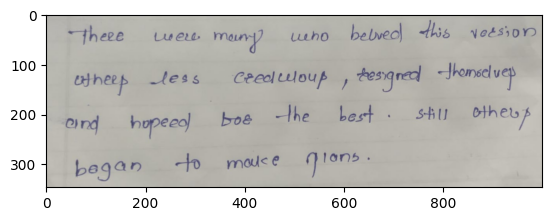

In [2]:
img = cv.imread('images/handwritten2.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

h, w, c = img.shape

if w > 1000:
    
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    img = cv.resize(img, (new_w, new_h), interpolation = cv.INTER_AREA)
plt.imshow(img);

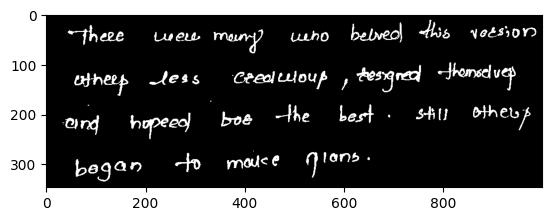

In [12]:
def thresholding(image):
    img_gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    ret,thresh = cv.threshold(img_gray,160,255,cv.THRESH_BINARY_INV)
    #200 :- it means below 200 turn into black and remaining 255
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img);

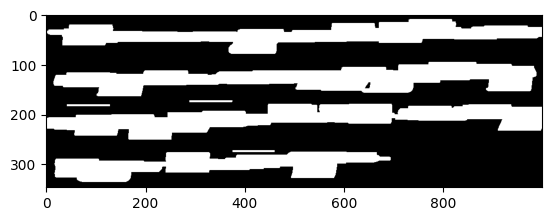

In [13]:
#dilation
kernel = np.ones((3,85), np.uint8)
dilated = cv.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray');

In [5]:
(contours, heirarchy) = cv.findContours(dilated.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv.boundingRect(ctr)[1])

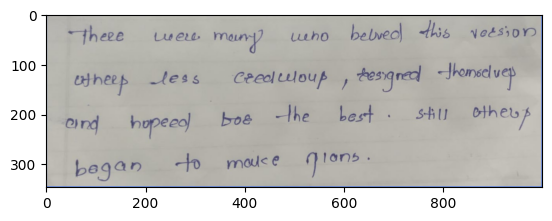

In [6]:
img2 = img.copy()

for ctr in sorted_contours_lines:
    
    x,y,w,h = cv.boundingRect(ctr)
    cv.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)
    #(40,100,250) color name and 2 is width of box
    
plt.imshow(img2);

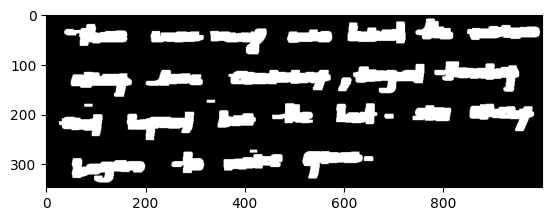

In [14]:


#dilation
kernel = np.ones((5,15), np.uint8)
dilated2 = cv.dilate(thresh_img, kernel, iterations =1)
plt.imshow(dilated2, cmap='gray');



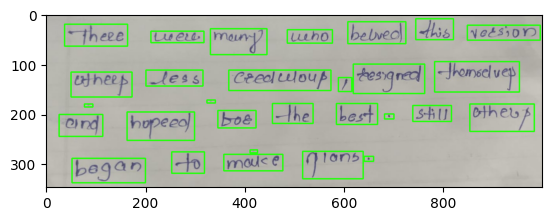

In [15]:


img3 = img.copy()
words_list = []

for line in sorted_contours_lines:
    
    # roi of each lineA
    x, y, w, h = cv.boundingRect(line)
    roi_line = dilated2[y:y+w, x:x+w]
    
    # draw contours on each word
    (cnt, heirarchy) = cv.findContours(roi_line.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv.boundingRect(cntr)[1])
    
    for word in sorted_contour_words:
        
        if cv.contourArea(word) < 50:
            continue
        
        x2, y2, w2, h2 = cv.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (36,255,12),2)
        
plt.imshow(img3);



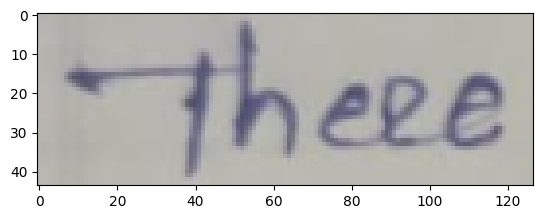

In [16]:
ninth_word = words_list[2]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

In [ ]:
ninth_word = words_list[2]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
cv.imwrite('images/f3.jpg',roi_9)
#plt.imshow(roi_9);



In [ ]:
display('images/f3.jpg')

In [ ]:
result=py.image_to_string('images/f3.jpg')
print(result)

In [ ]:
ocr=py.image_to_string('images/handwritten4.jpg')

In [ ]:
print(ocr)